Our Groups Goal!

Label + Data Integrity/ISRC

-number of streams by label

-country, year, registrant, random code

-use artist, title, songwriter to identify duplicate ISRC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

Might as well just upload those because that what you do in python.
Our team is  data integrity issues (isrc) / label.

In [2]:
%matplotlib inline

In [3]:
music_df = pd.read_csv("../data/NSS-Sample.csv")
music_df = music_df.rename(columns={"If ":"ISRC"})
music_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [4]:
music_df.isnull().sum()

ISRC                                         1760
Country Code                                 1697
Registrant Code                              1697
Year of Reference                            1761
Usage Period                                 8102
Streaming Platform (DSP)                     3999
Streams                                         0
Recording Artist                                0
Recording Label                              1008
Recording Title                                 0
Release Title                                  69
Recording Duration (Seconds)                    0
Songwriter's Listed (1 = "Yes", 0 = "No")       0
dtype: int64

In [5]:
music_df["ISRC"].fillna("", inplace = True)
music_df["Country Code"].fillna("", inplace = True)
music_df["Registrant Code"].fillna("", inplace = True)
music_df["Year of Reference"].fillna("", inplace = True)
music_df["Usage Period"].fillna("", inplace = True)
music_df["Streaming Platform (DSP)"].fillna("", inplace = True)
music_df["Streams"].fillna("", inplace = True)
music_df["Recording Artist"].fillna("", inplace = True)
music_df["Recording Label"].fillna("", inplace = True)
music_df["Recording Title"].fillna("", inplace = True)
music_df["Release Title"].fillna("", inplace = True)
music_df["Recording Duration (Seconds)"].fillna("", inplace = True)

In [6]:
music_df.isnull().sum()

ISRC                                         0
Country Code                                 0
Registrant Code                              0
Year of Reference                            0
Usage Period                                 0
Streaming Platform (DSP)                     0
Streams                                      0
Recording Artist                             0
Recording Label                              0
Recording Title                              0
Release Title                                0
Recording Duration (Seconds)                 0
Songwriter's Listed (1 = "Yes", 0 = "No")    0
dtype: int64

In [7]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","Month_Streamed",
                            "Platform","Streams","Artist","Label","Recording_Title","Release_Title",
                            "Duration_Sec","Songwriter_Listed"], axis=1)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISRC               100000 non-null  object
 1   Country            100000 non-null  object
 2   Registrant         100000 non-null  object
 3   Year               100000 non-null  object
 4   Month_Streamed     100000 non-null  object
 5   Platform           100000 non-null  object
 6   Streams            100000 non-null  object
 7   Artist             100000 non-null  object
 8   Label              100000 non-null  object
 9   Recording_Title    100000 non-null  object
 10  Release_Title      100000 non-null  object
 11  Duration_Sec       100000 non-null  int64 
 12  Songwriter_Listed  100000 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.9+ MB


Following code is getting rid of commas in the streams column to make it an integer

In [8]:
music_df['Streams'] = music_df['Streams'].astype(str)
music_df['Streams']=music_df['Streams'].str.replace(',','')
music_df['Streams'] = music_df['Streams'].astype(int)

So we're having an extrordinarily difficult time turning the years column into an integer. Why is this an impossible feat? Why does it refuse to turn into a string even though there are no nulls? Why does it refuse to turn into a float when there are no nulls???

In [9]:
indie = music_df[music_df['Artist'] == music_df['Label']]

In [10]:
music_df.describe()

,Streams,Duration_Sec,Songwriter_Listed
count,1.000000e+05,100000.000000,100000.000000
mean,5.626550e+04,1016.893690,0.541610
std,2.620276e+05,15565.692133,0.498268
min,1.000000e+00,0.000000,0.000000
25%,6.807000e+03,149.000000,0.000000
50%,1.677250e+04,190.000000,1.000000
75%,3.990300e+04,236.000000,1.000000
max,2.145617e+07,818738.000000,1.000000


In the following code, we're trying to create a chart that shows the streams by platform. Once we do that, we can also start showing the streams by label.

In [11]:
platform_sums = music_df.groupby(['Platform'], as_index=False).agg({'Streams':['sum']})
platform_sums.columns = ['Platform','Streams']
platform_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  30 non-null     object 
 1   Streams   30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [13]:
platform_sums.head()

,Platform,Streams
0,,4.703908e+07
1,Amazon,1.511998e+08
2,Anghami,3.468200e+04
3,Apple,1.606454e+09
4,AudioMack,1.199156e+07


In [16]:
label_sums = music_df.groupby(['Label'], as_index=False).agg({'Streams':['sum']})
label_sums.columns = ['Label','Streams']
label_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    11779 non-null  object
 1   Streams  11779 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 138.2+ KB


Using the code in this markdown isn't working because we're trying to make a grid with a series.

grid = sns.FacetGrid(music_df, hue = "Platform")
grid.map(sns.barplot, music_df['Label'], music_df.groupby('Platform')['Streams'].sum())
plt.xlim(reversed(plt.xlim()))
grid.add_legend()

C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Platform', ylabel='Streams'>

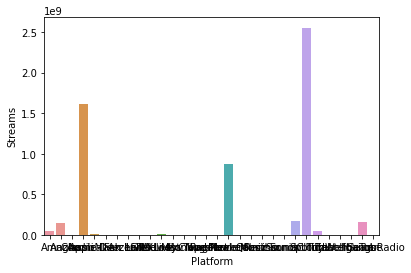

In [21]:
sns.barplot(platform_sums['Platform'],platform_sums['Streams'])
#wow ok so this gives us a chart i suppose but not QUITE what we're looking for.

In [23]:
print(platform_sums)

              Platform       Streams
0                       4.703908e+07
1               Amazon  1.511998e+08
2              Anghami  3.468200e+04
3                Apple  1.606454e+09
4            AudioMack  1.199156e+07
5   Classical Archives  2.000000e+01
6               Deezer  8.783000e+04
7            Fan Label  9.100000e+01
8                  GTL  1.280764e+06
9            LiveXLive  1.013070e+05
10             Melodyv  5.384657e+06
11        Midwest Tape  8.570800e+04
12            MixCloud  2.661000e+03
13           MonkingMe  3.549000e+03
14             NugsNet  1.107090e+05
15           Pacemaker  1.707000e+03
16             Pandora  8.742366e+08
17          PowerMusic  3.154000e+03
18               Qoboz  6.621000e+03
19             Recisio  2.900000e+01
20         Smithsonian  2.080000e+02
21               Sonos  3.140200e+04
22          SoundCloud  1.668138e+08
23             Spotify  2.552564e+09
24               Tidal  4.879313e+07
25              Trebel  1.493470e+05
2

dataframe1 = pd.DataFrame(data={"column1": [1, 2, 3, 4, 5]})
dataframe2 = pd.DataFrame(data={"column1": [1, 2]})

common = dataframe1.merge(dataframe2, on=["column1"])
result = dataframe1[~dataframe1.column1.isin(common.column1)]